<a href="https://colab.research.google.com/github/AshwinSharma-git/Data-Visualisation-HeatMaps-/blob/main/IMD_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing The IMDLIB**
---

IMDLIB is a python package to download and handle binary gridded data from the India Meteorological Department (IMD). For more information about the IMD datasets, the link of IMD Pune may be referred. It heavily employs the xarray for processing the datasets.

In [ ]:
pip install imdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the library and downloading the data**

In [ ]:
import imdlib as imd
start_yr = 2010
end_yr =2020
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = (r"D:\Metrological data\Rainfall data\Kolar dam") #Path to save the files

data=imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)
data

Downloading: rain for year 2010
Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Downloading: rain for year 2019
Downloading: rain for year 2020
Download Successful !!!


In [ ]:
ds = data.get_xarray()
print(ds)

<xarray.Dataset>
Dimensions:  (time: 4018, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Data variables:
    rain     (time, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-10-14 11:33:43.391981 Python
    references:   
    comment:      
    crs:          epsg:4326


**Converting The available data in CSV(Comma Separated Value) format**

In [ ]:
lat = 24
lon = 79.25
x=data.to_csv('Sonar 24 79.25.csv', lat, lon, file_dir)

**Plotting the Rainfall map**

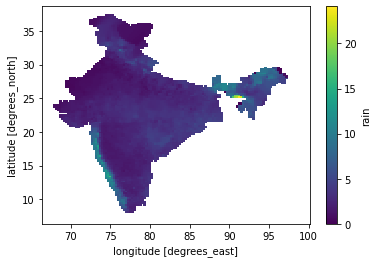

In [ ]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()

# Task
Generate heatmaps of minimum and maximum temperatures for India from 1950 to 2024. First, create a heatmap for the entire country using the provided shapefiles: "/content/india_states.shx", "/content/india_states.shp", "/content/india_states.prj", "/content/india_states.dbf", and "/content/india_states.cpg". Ensure accurate India borders are shown and use a color scheme where red represents hot and blue represents cool. Then, generate individual heatmaps for each state using the same shapefiles and color scheme, ensuring accurate state borders are shown.

## Data acquisition

### Subtask:
Obtain the minimum and maximum temperature data for India from 1950 to 2024 using the `imdlib` library.


**Reasoning**:
Obtain the minimum and maximum temperature data for India from 1950 to 2024 using the imdlib library.



In [ ]:
file_dir = "/tmp/imd_data"
data_tmin = imd.get_data('tmin', start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)
data_tmax = imd.get_data('tmax', start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

Downloading: mintemp for year 1960
Downloading: mintemp for year 1961
Downloading: mintemp for year 1962
Downloading: mintemp for year 1963
Downloading: mintemp for year 1964
Downloading: mintemp for year 1965
Downloading: mintemp for year 1966
Downloading: mintemp for year 1967
Downloading: mintemp for year 1968
Downloading: mintemp for year 1969
Downloading: mintemp for year 1970
Downloading: mintemp for year 1971
Downloading: mintemp for year 1972
Downloading: mintemp for year 1973
Downloading: mintemp for year 1974
Downloading: mintemp for year 1975
Downloading: mintemp for year 1976
Downloading: mintemp for year 1977
Downloading: mintemp for year 1978
Downloading: mintemp for year 1979
Downloading: mintemp for year 1980
Downloading: mintemp for year 1981
Downloading: mintemp for year 1982
Downloading: mintemp for year 1983
Downloading: mintemp for year 1984
Downloading: mintemp for year 1985
Downloading: mintemp for year 1986
Downloading: mintemp for year 1987
Downloading: mintemp

## Data wrangling

### Subtask:
Load the shapefiles for India and its states and process the temperature data to be compatible with the shapefile data for plotting.

In [ ]:
!pip install geopandas contextily

import geopandas as gpd

# Load the India shapefile
india_shapefile_path = "/content/india_states.shp"
india_gdf = gpd.read_file(india_shapefile_path)

display(india_gdf.head())

ST_NM                                           geometry
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.7942,...
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...

**Reasoning**:
Load the maximum and minimum temperature data into xarray DataFrames.

In [ ]:
ds_tmin = data_tmin.get_xarray()
ds_tmax = data_tmax.get_xarray()

print("Minimum Temperature Data:")
print(ds_tmin)

print("\nMaximum Temperature Data:")
print(ds_tmax)

Minimum Temperature Data:
<xarray.Dataset> Size: 183MB
Dimensions:  (time: 23742, lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * time     (time) datetime64[ns] 190kB 1960-01-01 1960-01-02 ... 2024-12-31
Data variables:
    tmin     (time, lat, lon) float64 183MB 99.9 99.9 99.9 ... 99.9 99.9 99.9
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2025-08-10 19:29:06.258580 Python
    references:   
    comment:      
    crs:          epsg:4326

Maximum Temperature Data:
<xarray.Dataset> Size: 183MB
Dimensions:  (time: 23742, lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * time     (time) datetime64[ns] 190kB 1960-01-01

**Reasoning**:
Calculate the average temperature across the time dimension for both minimum and maximum temperature datasets.

In [ ]:
ds_tmin_mean = ds_tmin.mean('time')
ds_tmax_mean = ds_tmax.mean('time')

print("Average Minimum Temperature Data:")
print(ds_tmin_mean)

print("\nAverage Maximum Temperature Data:")
print(ds_tmax_mean)

Average Minimum Temperature Data:
<xarray.Dataset> Size: 8kB
Dimensions:  (lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
Data variables:
    tmin     (lat, lon) float64 8kB 99.9 99.9 99.9 99.9 ... 99.9 99.9 99.9 99.9

Average Maximum Temperature Data:
<xarray.Dataset> Size: 8kB
Dimensions:  (lat: 31, lon: 31)
Coordinates:
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
Data variables:
    tmax     (lat, lon) float64 8kB 99.9 99.9 99.9 99.9 ... 99.9 99.9 99.9 99.9


**Reasoning**:
Convert the xarray DataArrays to pandas DataFrames for easier manipulation and merging with the shapefile data.

In [ ]:
df_tmin_mean = ds_tmin_mean.to_dataframe().reset_index()
df_tmax_mean = ds_tmax_mean.to_dataframe().reset_index()

display(df_tmin_mean.head())
display(df_tmax_mean.head())

lat   lon       tmin
0  7.5  67.5  99.900002
1  7.5  68.5  99.900002
2  7.5  69.5  99.900002
3  7.5  70.5  99.900002
4  7.5  71.5  99.900002

lat   lon       tmax
0  7.5  67.5  99.900002
1  7.5  68.5  99.900002
2  7.5  69.5  99.900002
3  7.5  70.5  99.900002
4  7.5  71.5  99.900002

## Visualize India heatmap

### Subtask:
Create a heatmap of the average minimum and maximum temperature across India for the specified time period, overlaying the India shapefile for accurate borders. Use a color scheme that represents hot (red) and cool (blue) temperatures.

**Reasoning**:
Merge the average temperature data with the India GeoDataFrame and then plot the heatmaps using the specified color scheme.

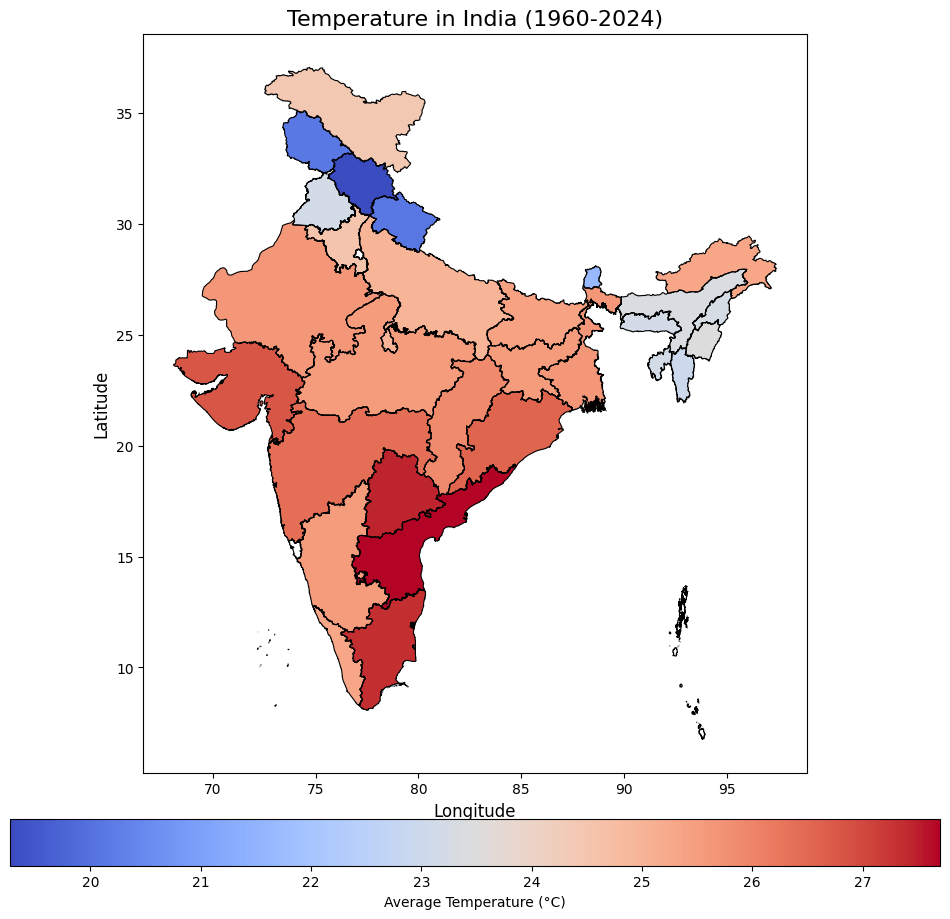

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Merge temperature data with the India GeoDataFrame
# We need to align the temperature data points with the spatial data from the shapefile.
# One way to do this is to create a GeoDataFrame from the temperature data
# and then perform a spatial join with the India shapefile.

# Create a GeoDataFrame from the temperature data
geometry_tmin = [Point(xy) for xy in zip(df_tmin_mean['lon'], df_tmin_mean['lat'])]
gdf_tmin = gpd.GeoDataFrame(df_tmin_mean, geometry=geometry_tmin)

geometry_tmax = [Point(xy) for xy in zip(df_tmax_mean['lon'], df_tmax_mean['lat'])]
gdf_tmax = gpd.GeoDataFrame(df_tmax_mean, geometry=geometry_tmax)


# Set the coordinate reference system (CRS) for the temperature GeoDataFrames
# Assuming the temperature data uses the same CRS as the shapefile (EPSG:4326)
gdf_tmin = gdf_tmin.set_crs(india_gdf.crs)
gdf_tmax = gdf_tmax.set_crs(india_gdf.crs)

# Reset index of india_gdf before spatial join to preserve original index
india_gdf_reset = india_gdf.reset_index()

# Perform a spatial join to associate temperature data points with states
# We will join the temperature points to the states that contain them.
india_tmin_merged = gpd.sjoin(india_gdf_reset, gdf_tmin, how="inner", predicate="contains")
india_tmax_merged = gpd.sjoin(india_gdf_reset, gdf_tmax, how="inner", predicate="contains")

# Calculate the average temperature for each state based on the merged data
# We need to group by the original state index to calculate the mean for each state
india_tmin_avg_state = india_tmin_merged.groupby('index')['tmin'].mean().reset_index()
india_tmax_avg_state = india_tmax_merged.groupby('index')['tmax'].mean().reset_index()

# Merge the average temperatures back to the original india_gdf
india_gdf_avg_temp = india_gdf.merge(india_tmin_avg_state, left_index=True, right_on='index')
india_gdf_avg_temp = india_gdf_avg_temp.merge(india_tmax_avg_state, left_on='index', right_on='index')

# Calculate the overall average temperature for plotting
india_gdf_avg_temp['avg_temp'] = (india_gdf_avg_temp['tmin'] + india_gdf_avg_temp['tmax']) / 2.0

# Plotting the combined heatmap for average temperature
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) # Increased figure size
india_gdf_avg_temp.plot(column='avg_temp', ax=ax, legend=True, cmap='coolwarm',
                       legend_kwds={'label': "Average Temperature (°C)",
                                    'orientation': "horizontal",
                                    'pad': 0.05}) # Added padding for legend
india_gdf.boundary.plot(ax=ax, linewidth=0.8, color='black') # Adjusted linewidth
ax.set_title('Temperature in India (1960-2024)', fontsize=16) # Added fontsize
ax.set_xlabel('Longitude', fontsize=12) # Added fontsize
ax.set_ylabel('Latitude', fontsize=12) # Added fontsize
plt.show()

## Visualize state heatmaps

### Subtask:
Iterate through each state in the shapefile and create a heatmap of the average minimum and maximum temperature for that state, using the state's shapefile for accurate borders and the specified color scheme.

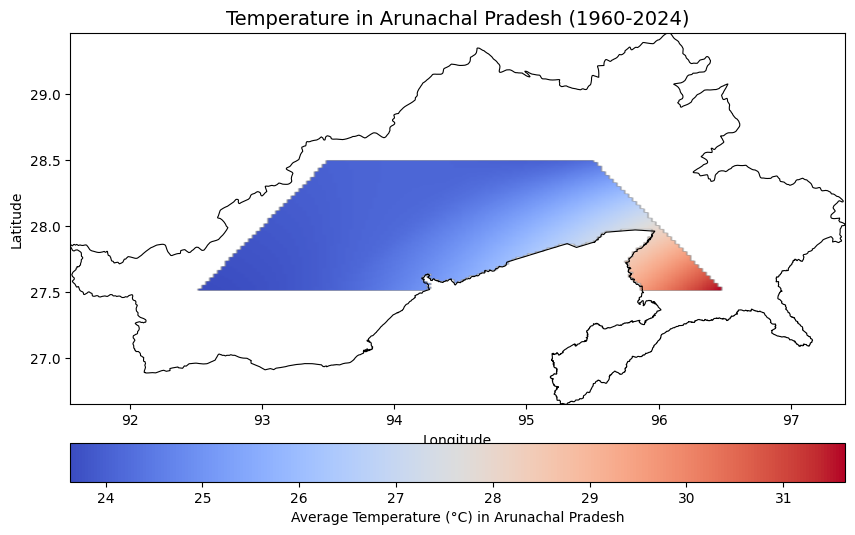

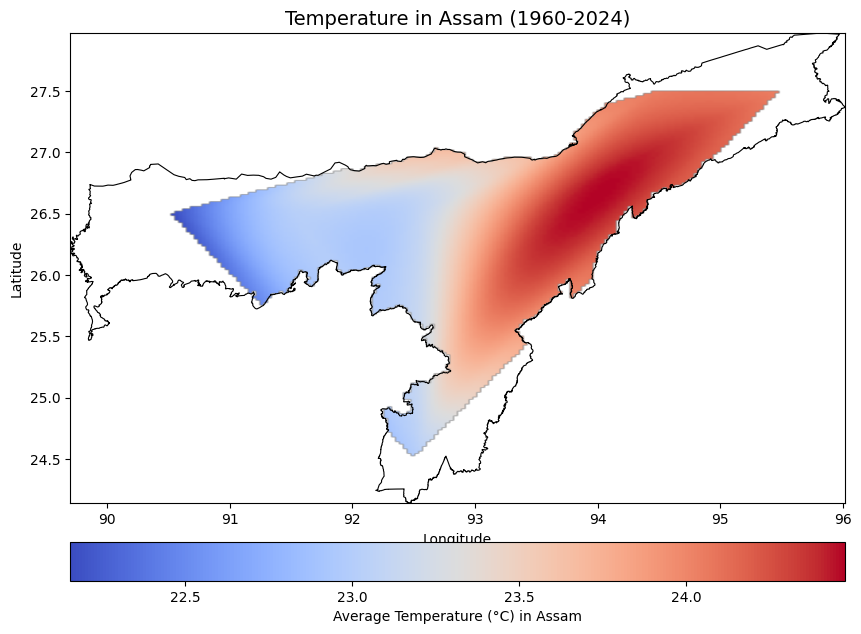

No data points found for Chandigarh. Skipping heatmap generation.


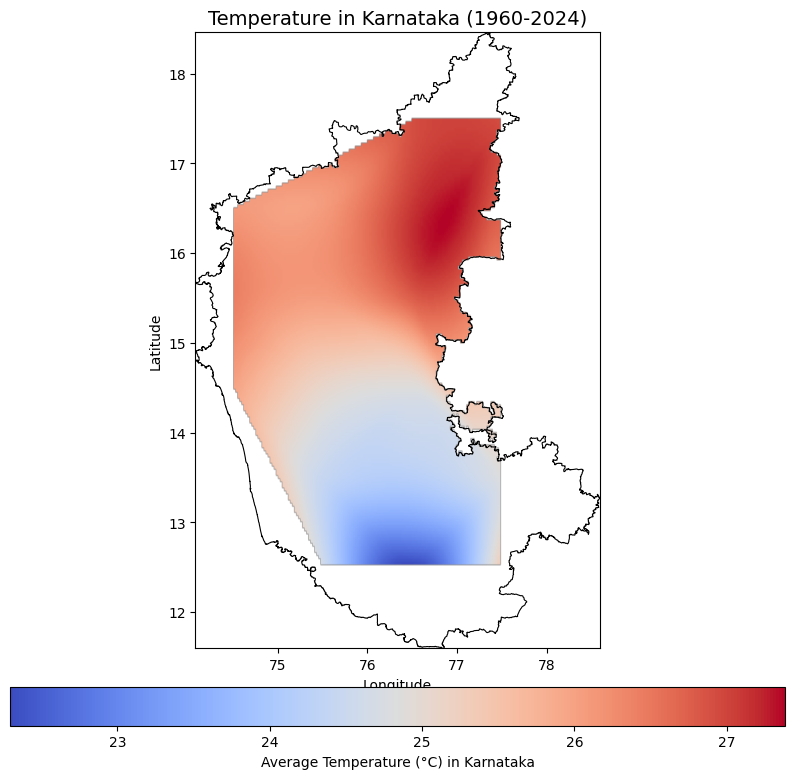

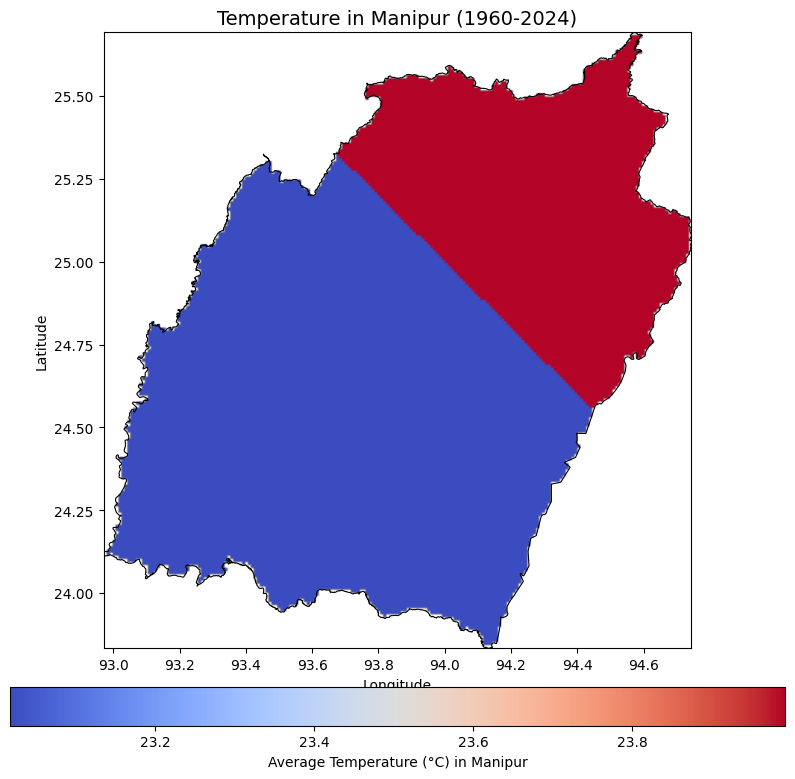

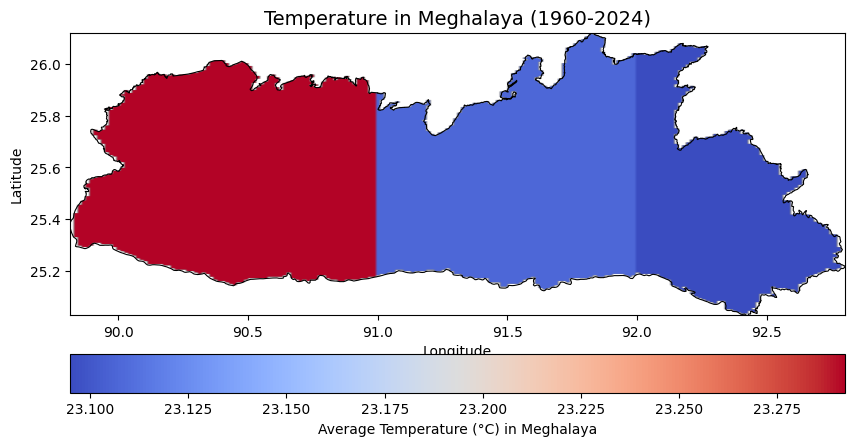

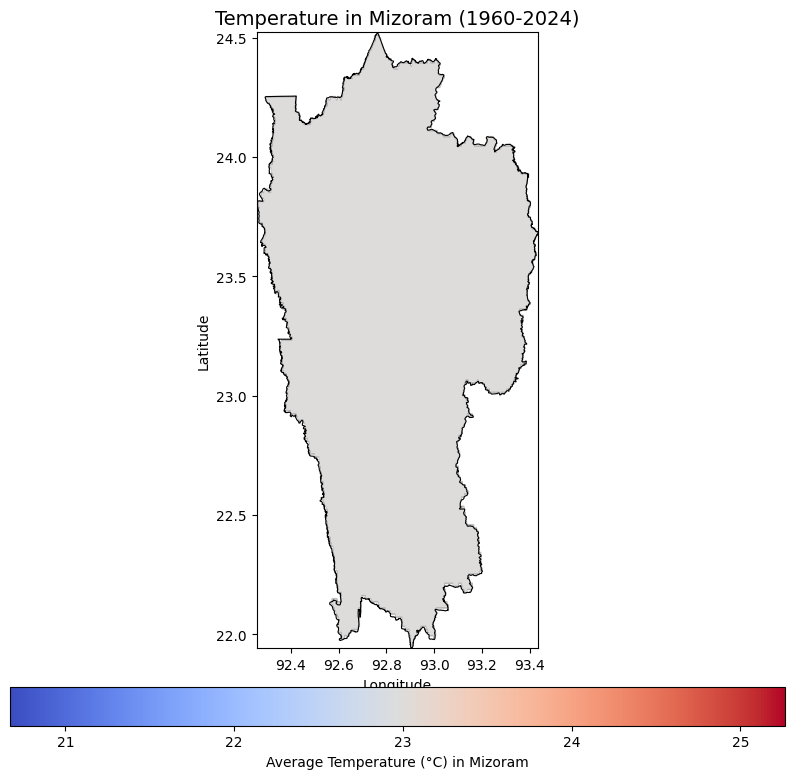

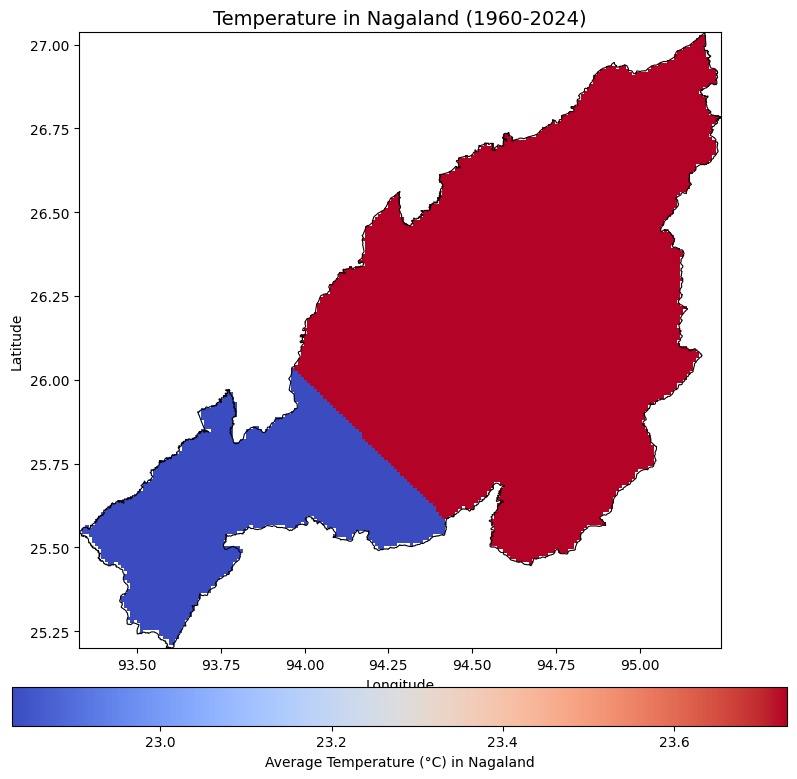

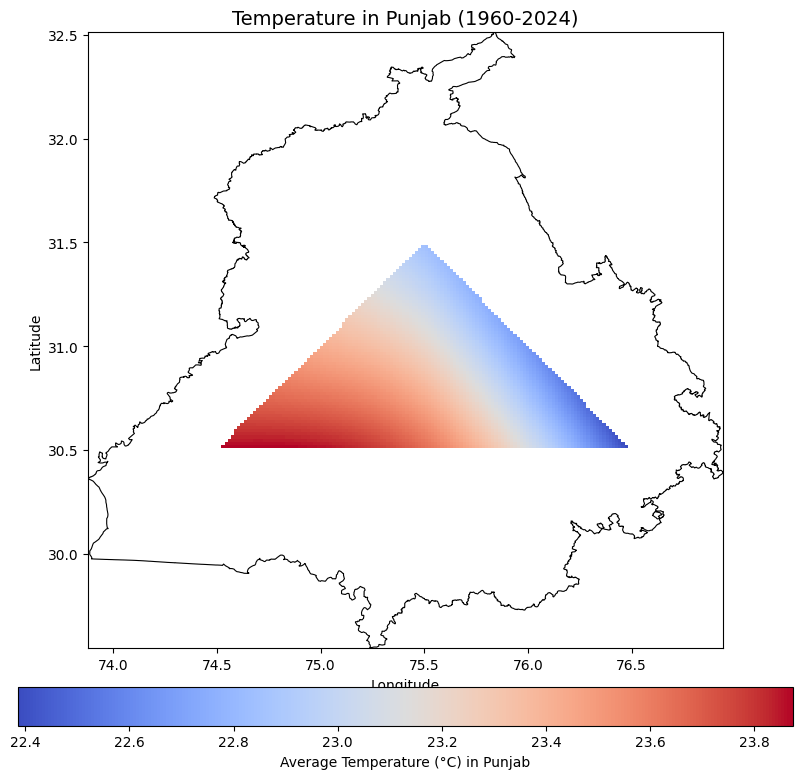

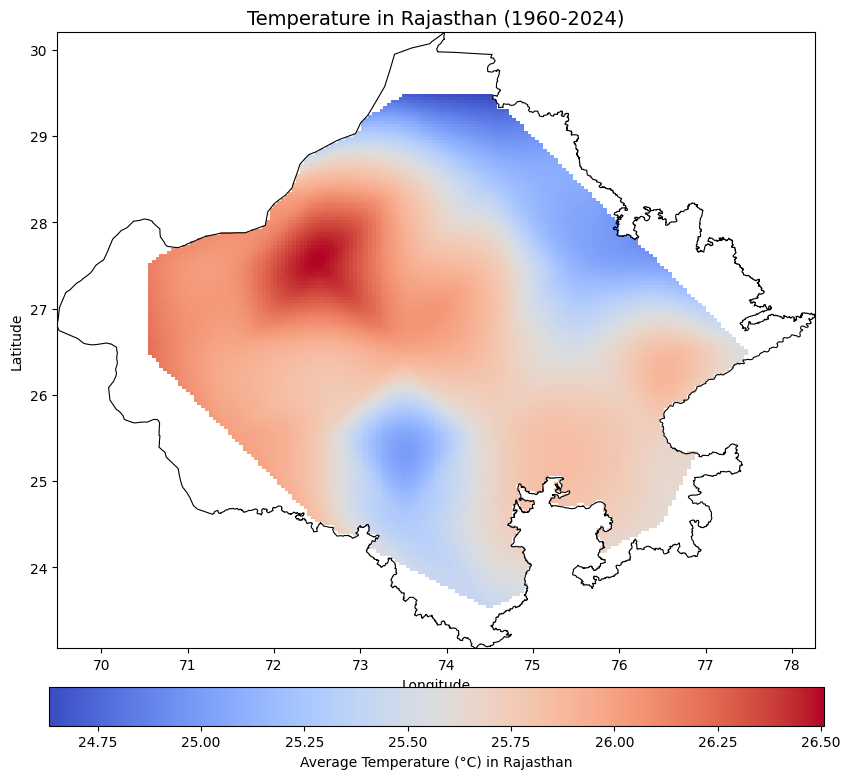

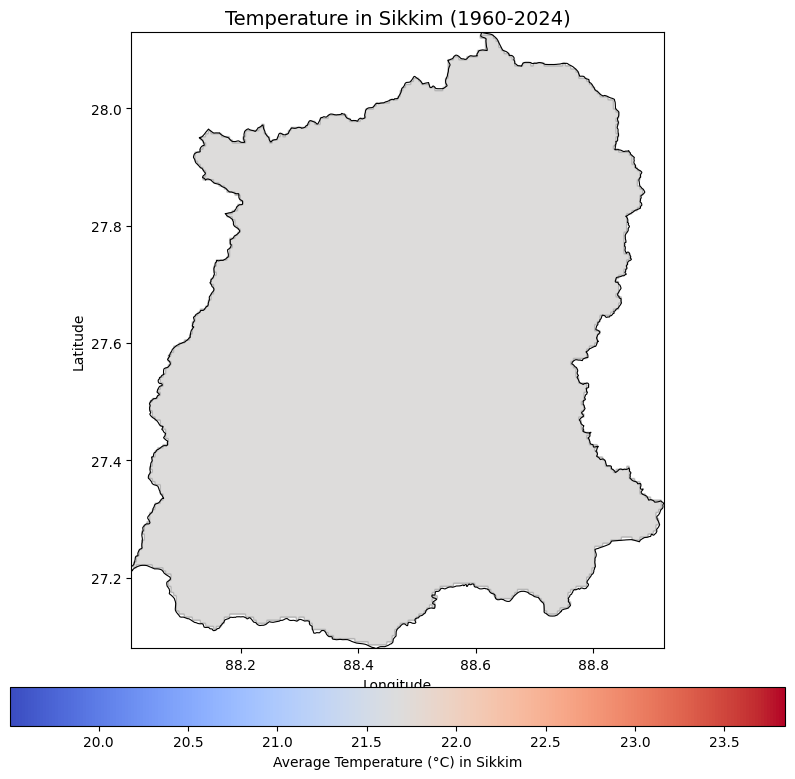

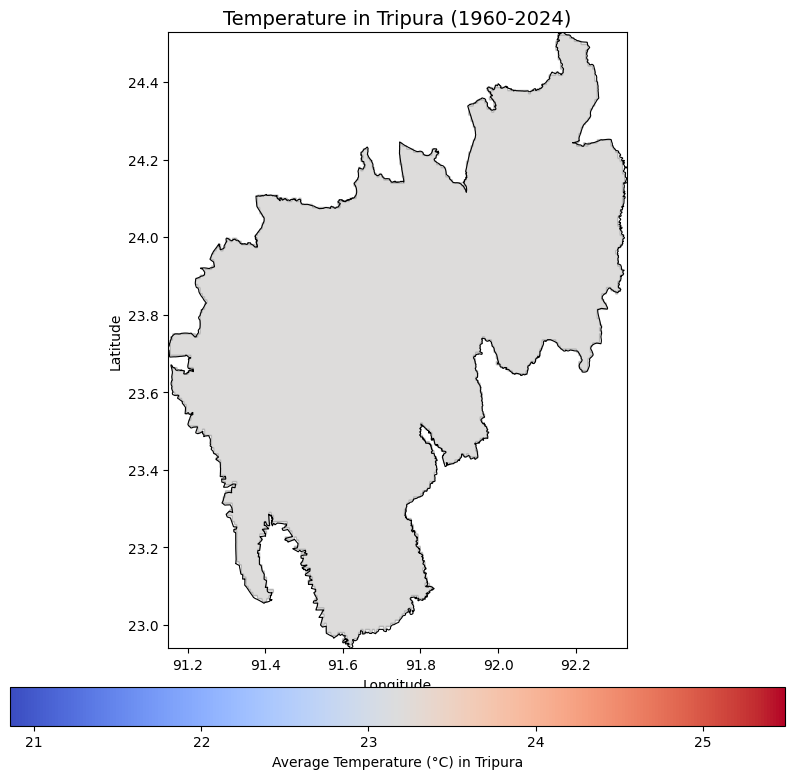

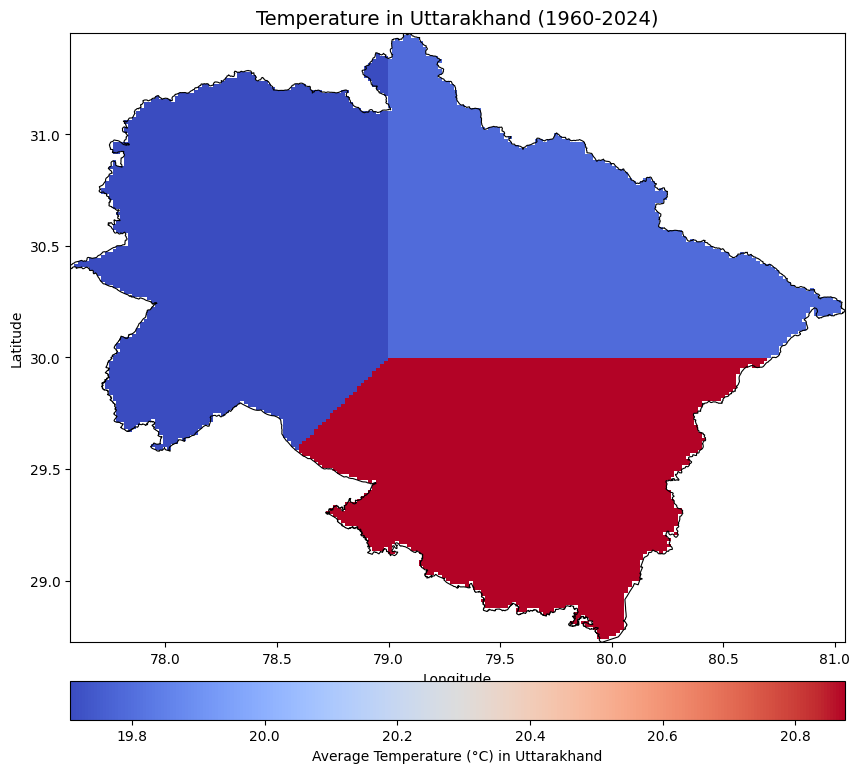

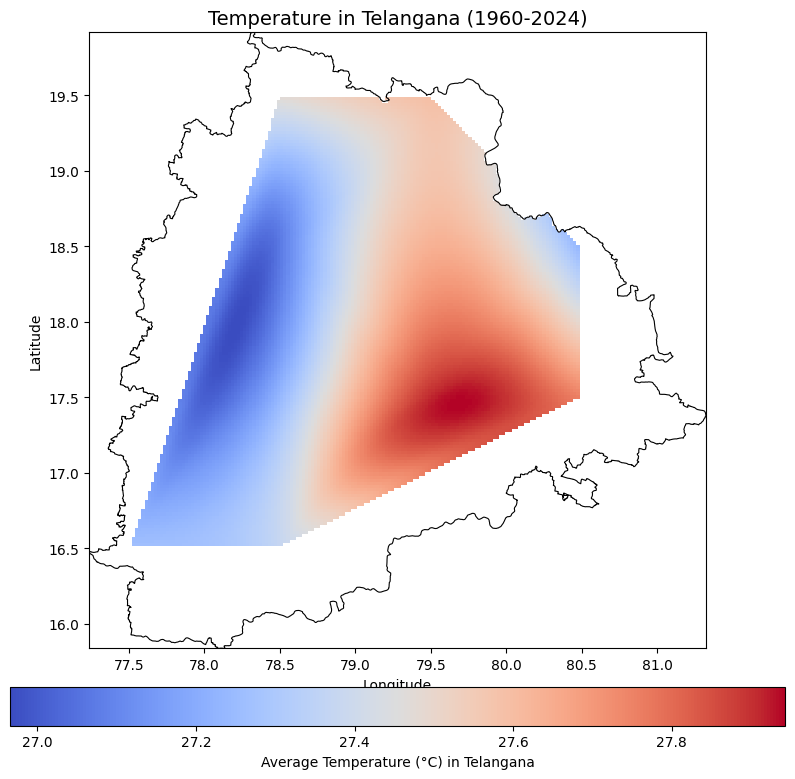

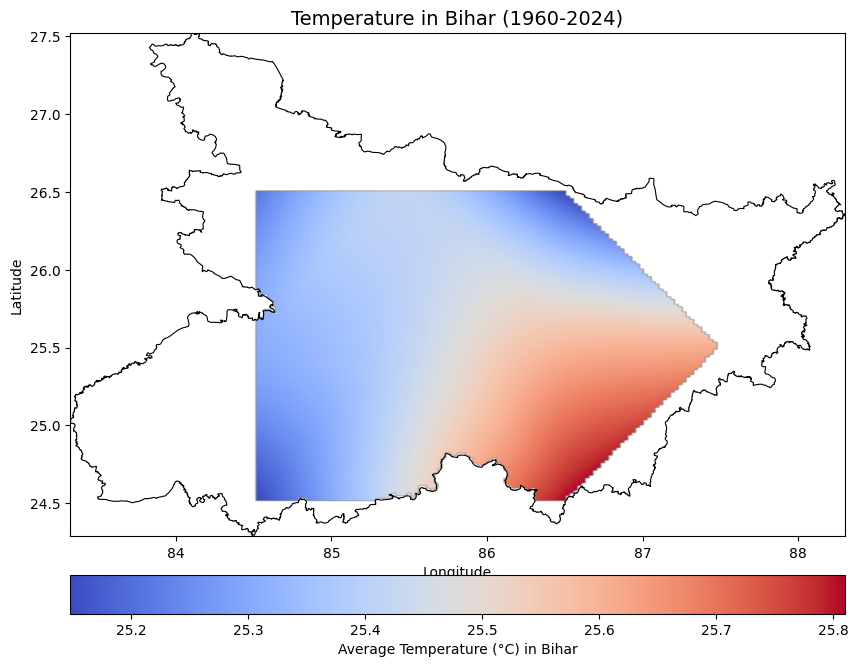

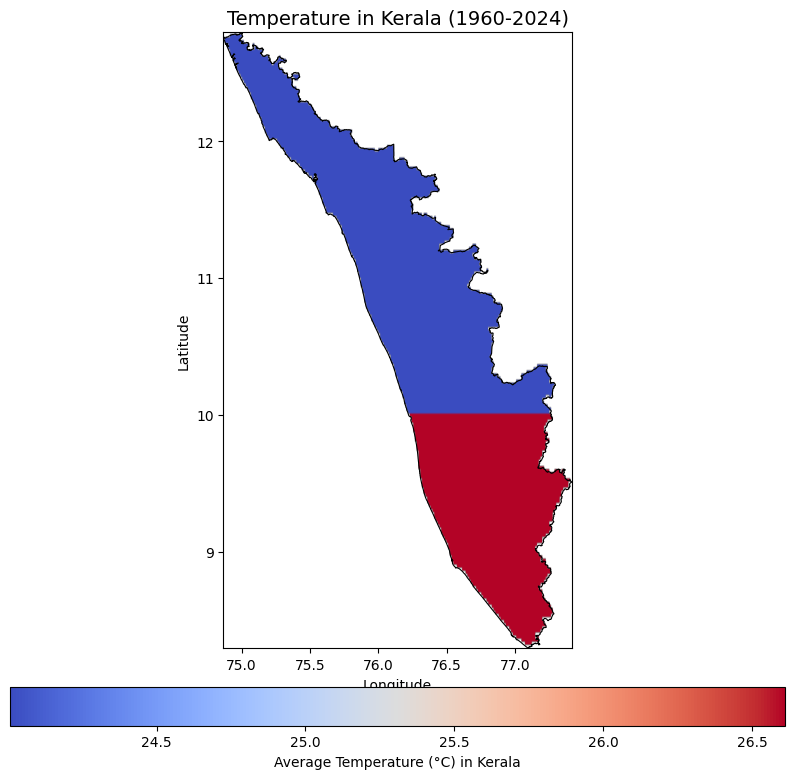

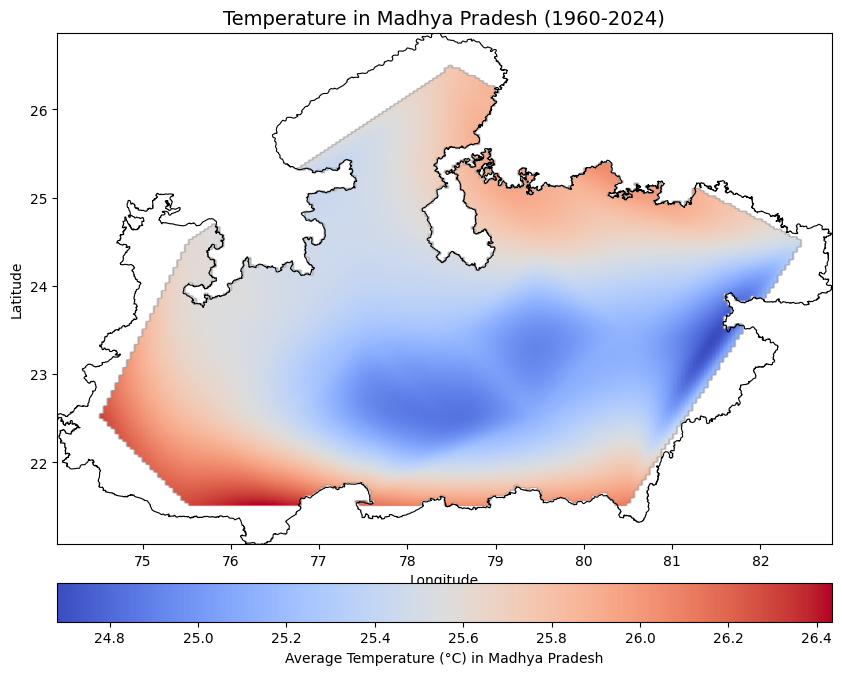

No data points found for Andaman & Nicobar. Skipping heatmap generation.


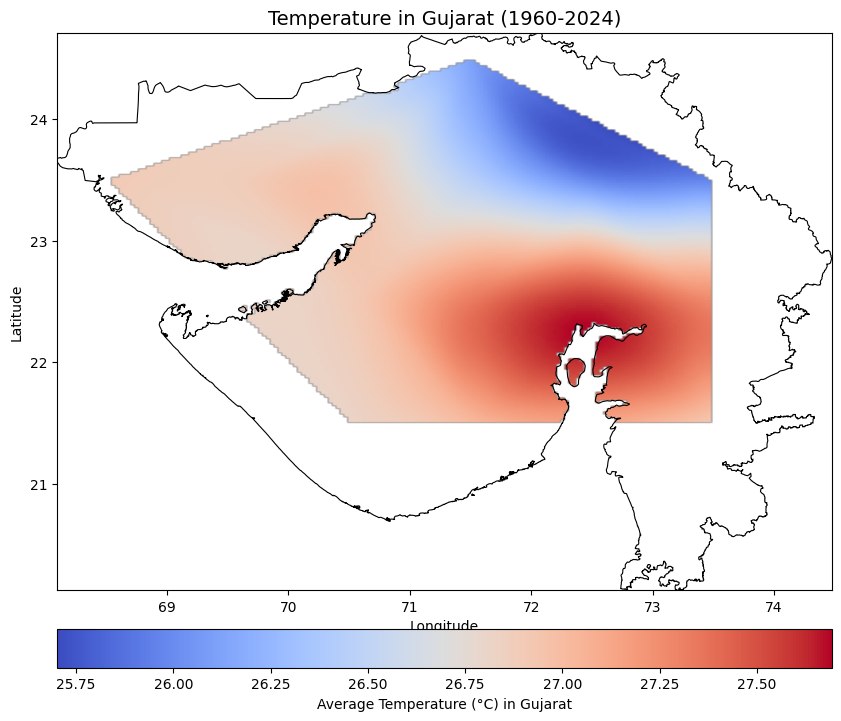

No data points found for Lakshadweep. Skipping heatmap generation.


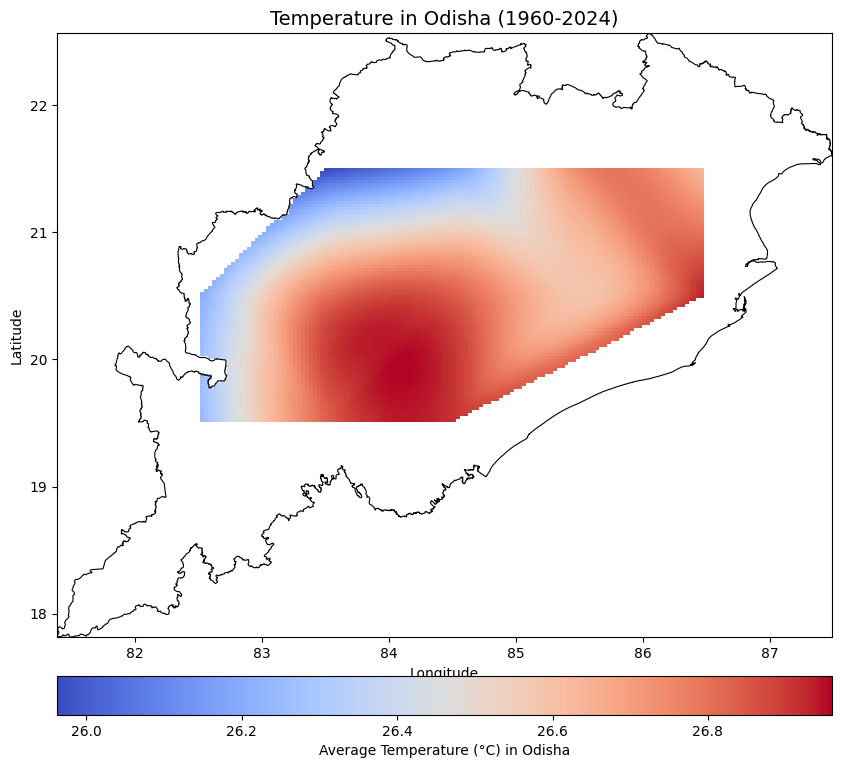

No data points found for Dadra and Nagar Haveli and Daman and Diu. Skipping heatmap generation.


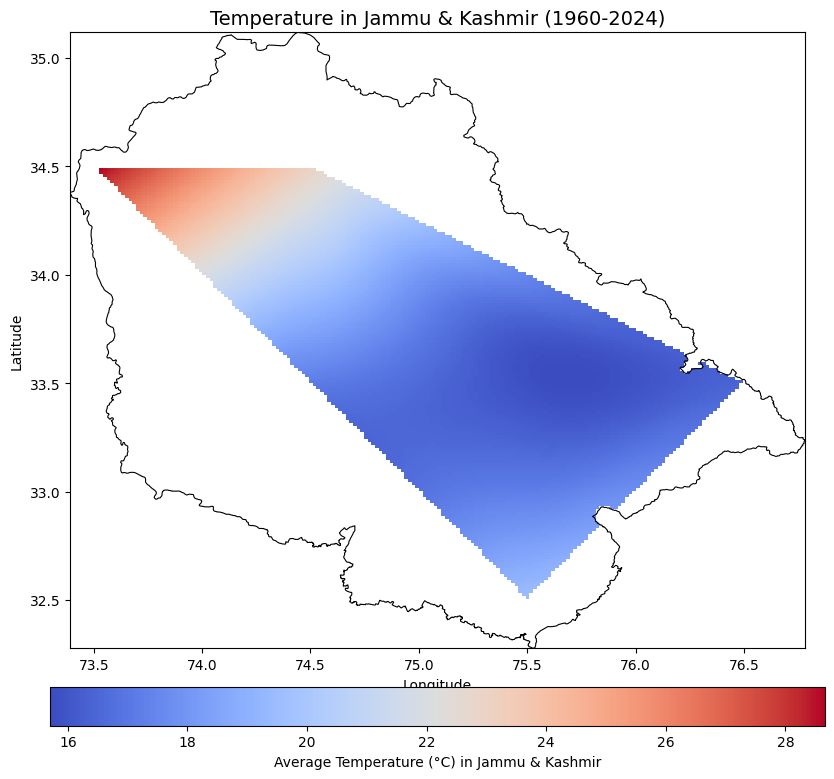

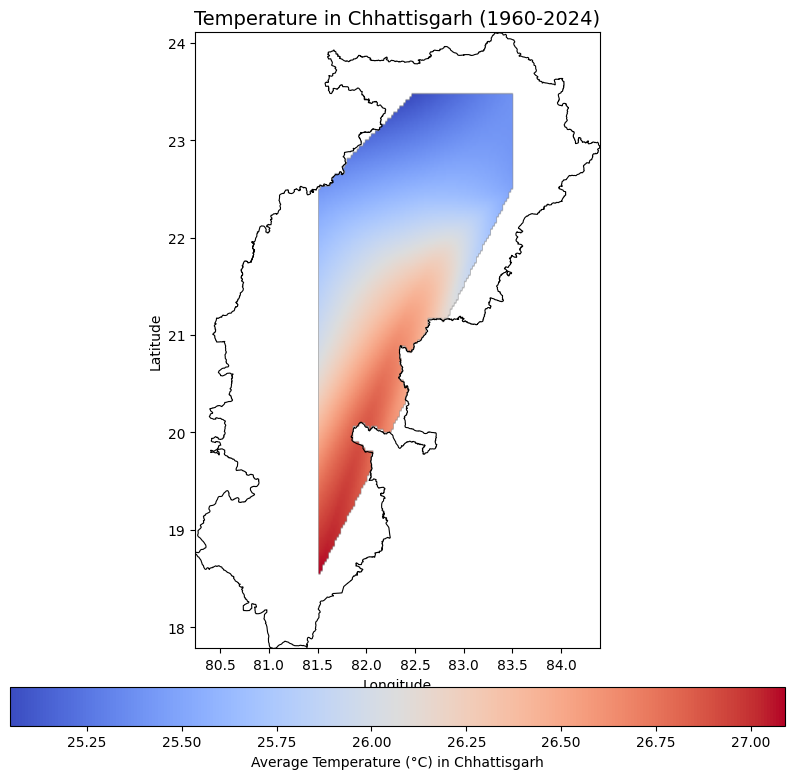

No data points found for Delhi. Skipping heatmap generation.
No data points found for Goa. Skipping heatmap generation.


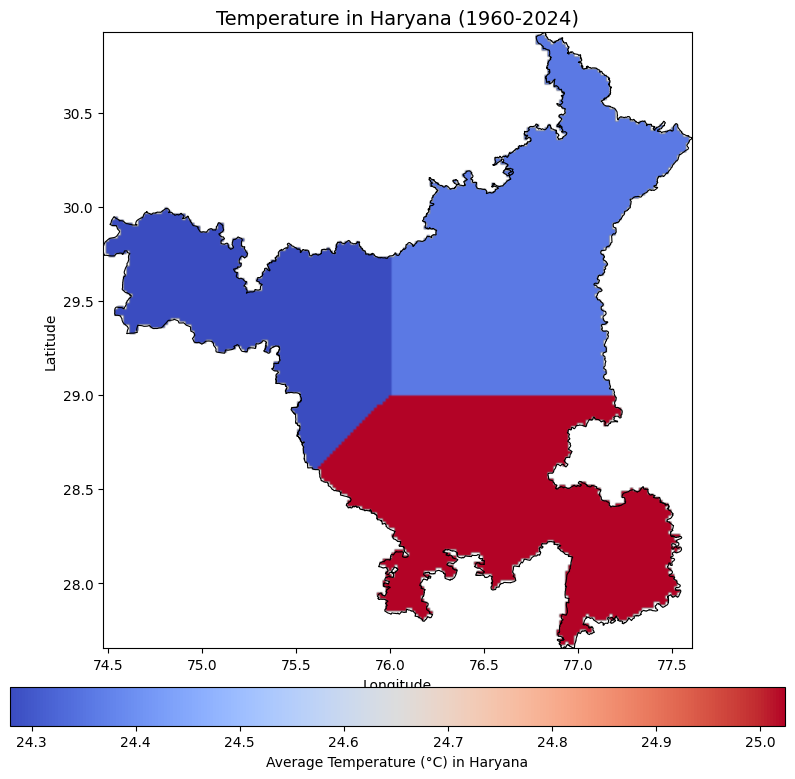

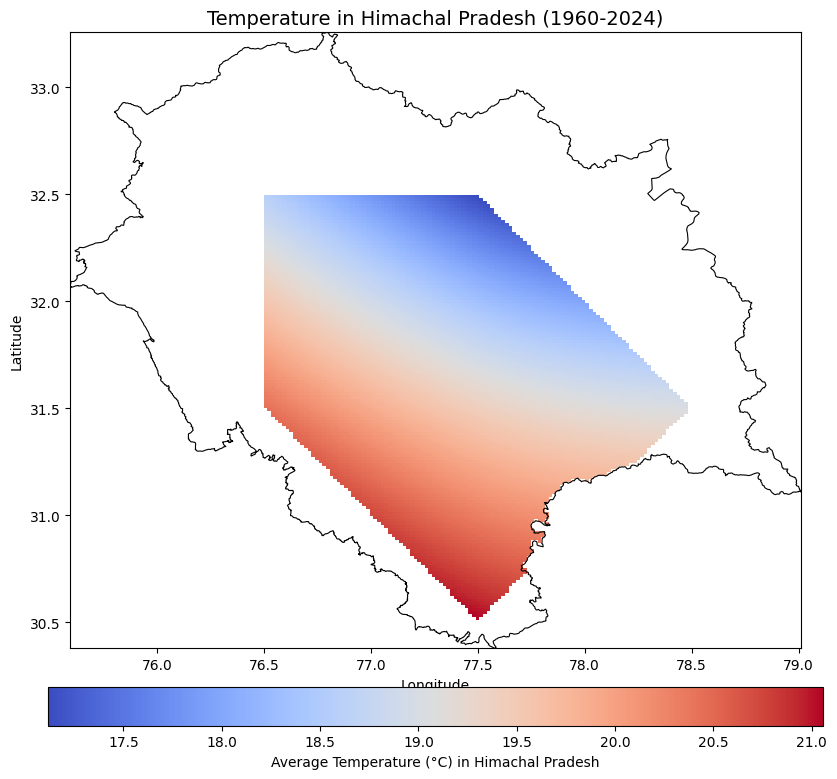

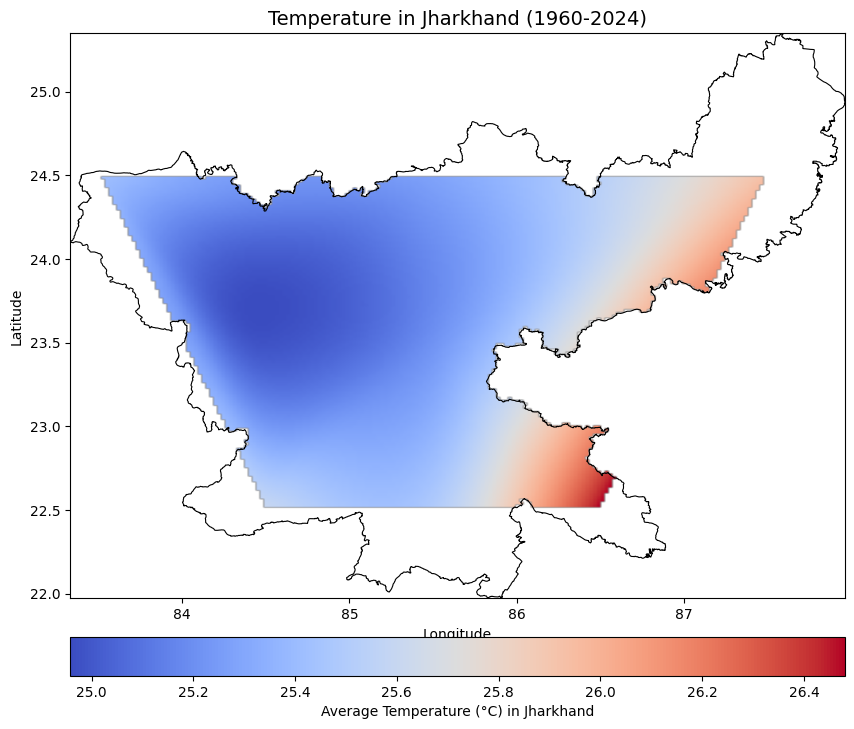

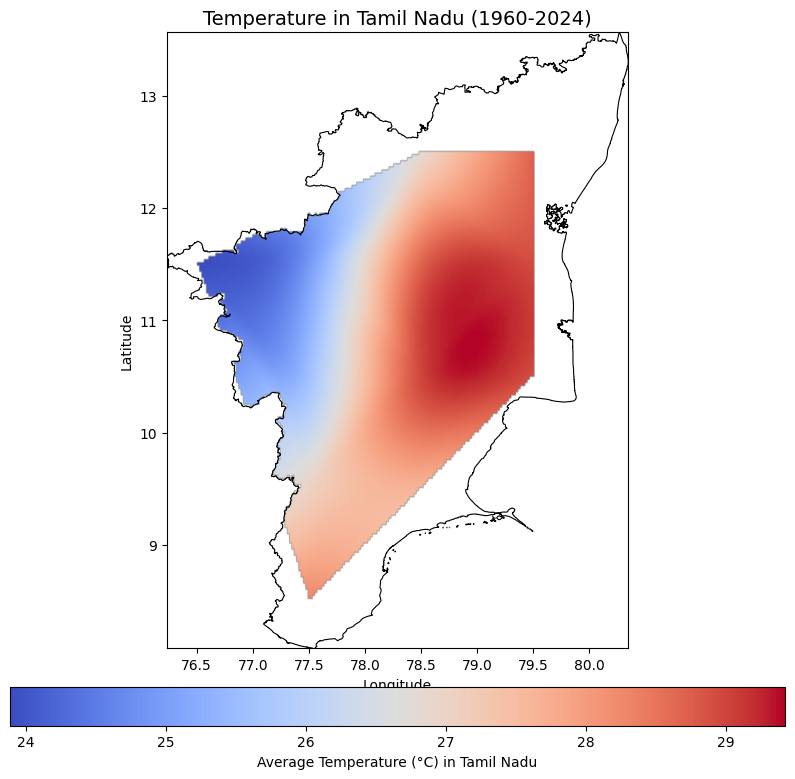

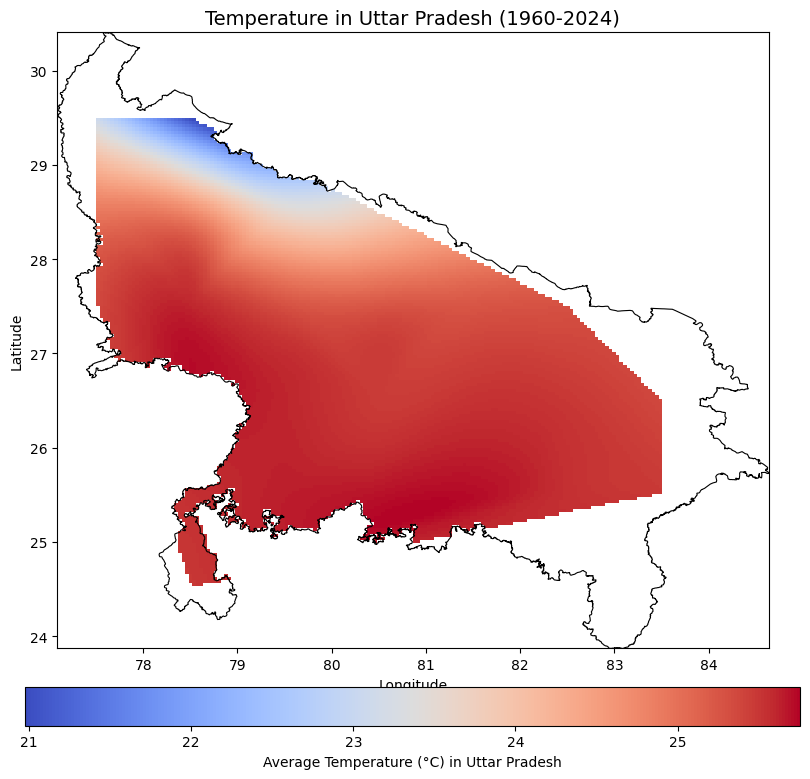

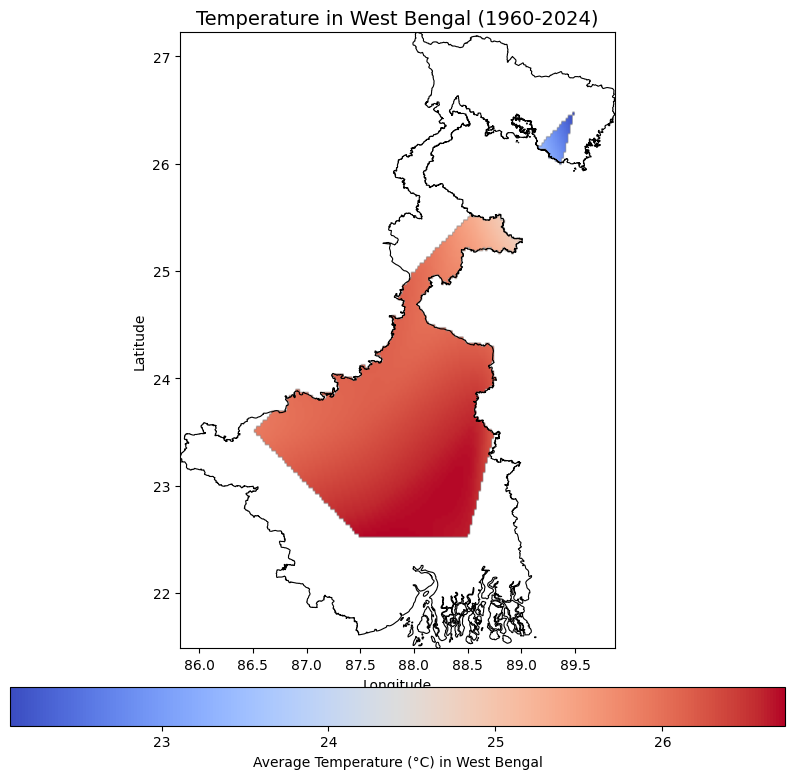

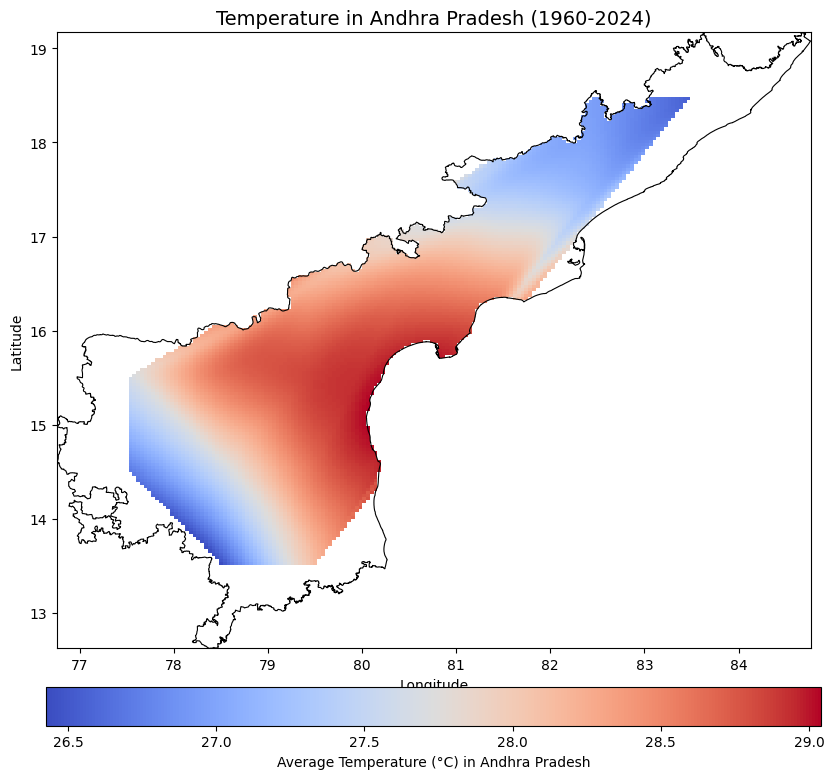

No data points found for Puducherry. Skipping heatmap generation.


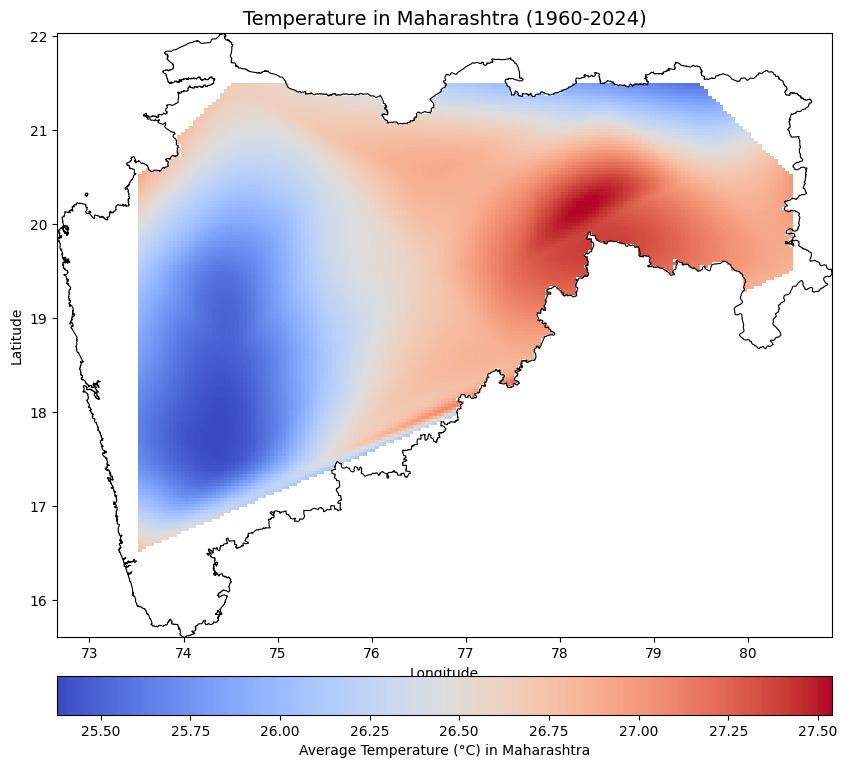

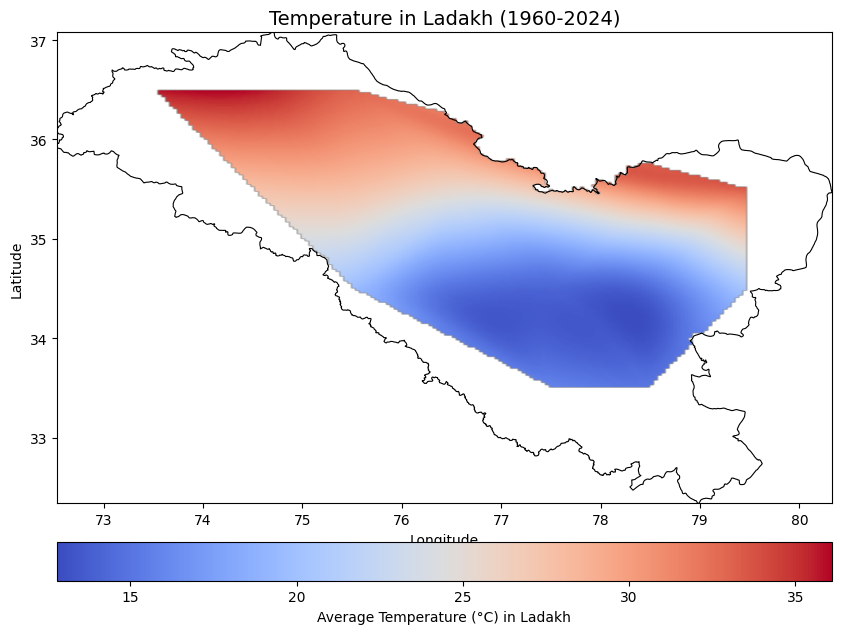

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.interpolate import griddata
import numpy as np
import matplotlib.colors as mcolors


# Iterate through each state and create a heatmap
for index, state in india_gdf.iterrows():
    state_name = state['ST_NM']
    state_geometry = state.geometry

    # Clip the temperature data to the state boundary
    state_tmin_clipped = gdf_tmin.clip(state_geometry)
    state_tmax_clipped = gdf_tmax.clip(state_geometry)

    # Calculate the average temperature for each data point within the state
    # Ensure that the indices are aligned before calculating the mean
    state_tmin_clipped = state_tmin_clipped.set_index(['lat', 'lon'])
    state_tmax_clipped = state_tmax_clipped.set_index(['lat', 'lon'])

    # Calculate the average temperature for each point
    state_avg_temp = (state_tmin_clipped['tmin'] + state_tmax_clipped['tmax']) / 2.0

    # Convert the Series back to a GeoDataFrame
    state_avg_temp_gdf = state_avg_temp.to_frame(name='avg_temp').reset_index()

    # Do not skip states, even with limited data
    if not state_avg_temp_gdf.empty:
        # Get the coordinates and temperature values
        points = state_avg_temp_gdf[['lon', 'lat']].values
        values = state_avg_temp_gdf['avg_temp'].values

        # Create a grid for interpolation within the bounds of the state
        x_min, y_min, x_max, y_max = state_geometry.bounds
        # Increase grid resolution for better detail
        grid_x, grid_y = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

        # Determine interpolation method based on number of points
        # Use cubic for 4 or more points, nearest for less than 4 to avoid QhullError
        if len(points) >= 4:
            method = 'cubic'
        else:
             method = 'nearest' # Use nearest for states with 1, 2, or 3 points


        # Interpolate the temperature data
        grid_z = griddata(points, values, (grid_x, grid_y), method=method)

        # Mask the interpolated grid with the state geometry
        # Create a grid of points from the interpolated grid
        grid_points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(grid_x.ravel(), grid_y.ravel())], crs=india_gdf.crs)

        # Perform a spatial join to find which grid points are within the state geometry
        masked_grid_points = grid_points.sjoin(gpd.GeoDataFrame([state], geometry='geometry', crs=india_gdf.crs), how="inner", predicate="within")

        # Create a mask based on the spatial join
        mask = np.zeros(grid_x.shape, dtype=bool)
        # Convert the indices from the spatial join back to the original grid shape
        indices = masked_grid_points.index.values
        row_indices, col_indices = np.unravel_index(indices, grid_x.shape)
        mask[row_indices, col_indices] = True

        # Apply the mask to the interpolated data
        grid_z_masked = np.ma.masked_where(~mask, grid_z)


        # Create a figure and axes for plotting
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        # Plot the interpolated and masked data as a heatmap
        im = ax.imshow(grid_z_masked.T, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='coolwarm', aspect='auto')

        # Plot the state boundary
        gpd.GeoDataFrame([state], geometry='geometry').boundary.plot(ax=ax, linewidth=0.8, color='black') # Adjusted linewidth

        # Add colorbar
        cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
        cbar.set_label(f"Average Temperature (°C) in {state_name}")

        ax.set_title(f'Temperature in {state_name} (1960-2024)', fontsize=14) # Added fontsize
        ax.set_xlabel('Longitude', fontsize=10) # Added fontsize
        ax.set_ylabel('Latitude', fontsize=10) # Added fontsize
        plt.show()
    else:
        print(f"No data points found for {state_name}. Skipping heatmap generation.")

## Refine visualizations

### Subtask:
Adjust color scales, labels, and titles for clarity and aesthetic appeal in both the India and state heatmaps.